In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Christian Jay Baguio
## DS2A

# 1. Look for a dataset you can work on.

## Titanic - Machine Learning from Disaster DataSets

#### The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In [3]:
tds_ds = pd.read_csv("titanic_dataset.csv")
tds_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tds_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. Using Jupyter Notebook perform bivariate analysis by looking at the following:
## a.scatter plot
## b. correlation coefficient
## c. regression equation

## Create a Scatter Plot from the given data set 

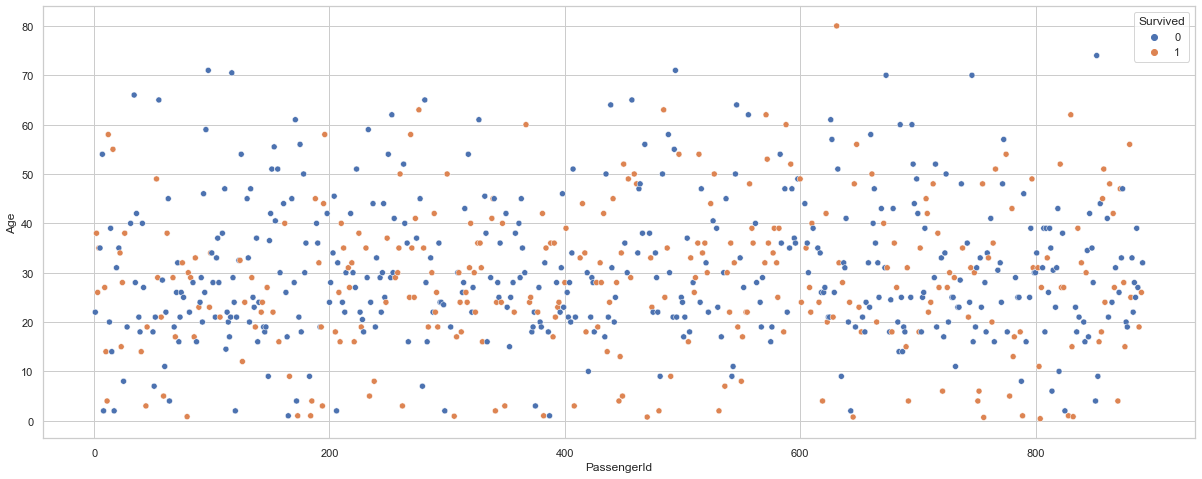

In [5]:
#creating a scatterplot using seaborn
sns.set_theme(style = "whitegrid")

fig_1 = plt.figure(figsize = (8, 6))
axes_1 = fig_1.add_axes([2,2,2,1])
axes_1 = sns.scatterplot(data = tds_ds, x = "PassengerId", y = "Age", hue = "Survived")

Text(0.5, 1.0, 'Titanic Dataset')

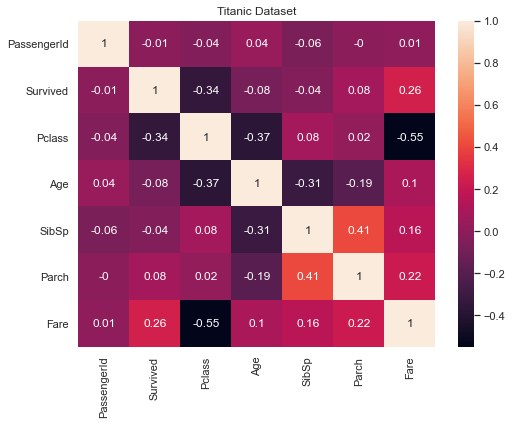

In [53]:
#finding a correlation on the dataset
tds_ds_cor = tds_ds.corr().round(2)
tds_ds_cor.head()

#creating a heatmap for the dataset
plt.figure(figsize = (8, 6))
plot = sns.heatmap(tds_ds.corr().round(2), annot = True)
plot.set_title("Titanic Dataset")

There is a correlation between Parch(# of parents / children aboard the Titanic) and the SibSp(# of siblings / spouses aboard the Titanic). Also there is a correlation between Survived and Parch.

## Create Train and Test sets 

### need to split our variables into training and testing sets. Using the training set, we’ll build the model and perform the model on the testing set. We’ll divide the training and testing sets into a 7:3 ratio, respectively. 

In [64]:
# Splitting the varaibles as training and testing
x = tds_ds["PassengerId"]
y = tds_ds["Age"]

from sklearn.model_selection import train_test_split
x_data, x_test, y_data, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Take a look at the train dataset
x_data
y_data

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
x_data_sm = sm.add_constant(x_data)
x_data_sm

,const,PassengerId
69,1.0,70
85,1.0,86
794,1.0,795
161,1.0,162
815,1.0,816
...,...,...
855,1.0,856
871,1.0,872
835,1.0,836
792,1.0,793


Once we’ve added constant, we can fit the regression line using OLS (Ordinary Least Square) method present in the statsmodel. After that, we’ll see the parameters,c and m of the straight line.

In [4]:
tds_ds_cor = tds_ds.corr().round(2)
tds_ds_cor.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
